In [54]:
import numpy as np
from matplotlib import pyplot as plt

from diffusion_avatars.constants import TEST_SEQUENCES, SERIALS
from diffusion_avatars.data_manager.rendering_data_manager import RenderingDataFolder

# 1. Load Dataset

In [8]:
dataset_version = 'v0.49'

data_manager = RenderingDataFolder().open_dataset(dataset_version)

In [10]:
data_stats = data_manager.load_stats()

participant_id = int(next(iter(data_stats.available_sequences.keys())))
sequence_name = TEST_SEQUENCES[participant_id][0]

# 2. Show pre-computed renderings

In [32]:
serial = SERIALS[0]
timestep = 0

## 2.1. Normals

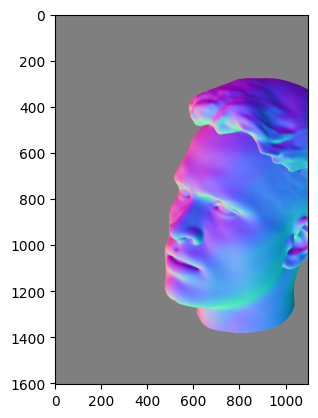

In [33]:
normals_rendering = data_manager.load_normals_rendering(participant_id, sequence_name, timestep, serial)
normals_rendering = (normals_rendering + 1) / 2  # [-1, 1] -> [0, 1]
plt.imshow(normals_rendering)
plt.show()

## 2.2. Depth

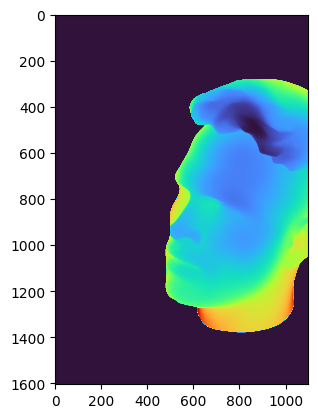

In [49]:
depth_rendering = data_manager.load_depth_rendering(participant_id, sequence_name, timestep, serial)
max_depth = depth_rendering.max()
min_depth = depth_rendering[depth_rendering > 0].min()
plt.imshow(depth_rendering, cmap='turbo', vmin=min_depth, vmax=max_depth)
plt.show()

## 2.3. Canonical coordinates (used for uv mapping)

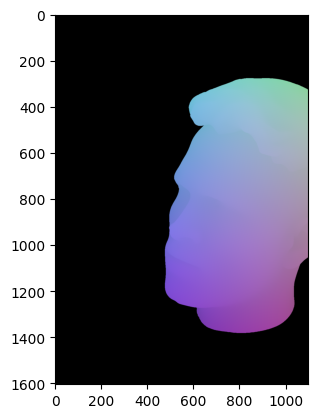

In [52]:
uv_rendering = data_manager.load_uv_rendering(participant_id, sequence_name, timestep, serial)
plt.imshow(uv_rendering)
plt.show()

## 2.4. Ambient coordinates (used for uv mapping) 

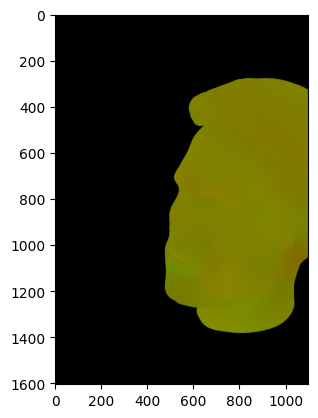

In [59]:
ambient_rendering = data_manager.load_uv_ambient_rendering(participant_id, sequence_name, timestep, serial)
ambient_rendering = np.concatenate([ambient_rendering, np.zeros((*ambient_rendering.shape[:-1], 1))], axis=-1)  # Add 3rd channels of 0s for visualization
plt.imshow(ambient_rendering)
plt.show()

## 2.5. Color image (TODO)